In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
pip install --upgrade pandas --user

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
print(pd.__version__)
print(pd.__file__)

2.0.3
C:\Users\Mehak\AppData\Roaming\Python\Python38\site-packages\pandas\__init__.py


In [6]:
warnings.filterwarnings('ignore', category=UserWarning)

In [7]:
sns.set(style='darkgrid')

In [31]:
df = pd.read_csv(r"C:\Users\Mehak\Downloads\archive (14)\train_u6lujuX_CVtuZ9i.csv")

In [26]:
df.shape

(614, 13)

In [32]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [34]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [10]:
df['Dependents'] = df['Dependents'].astype(str).str.rstrip('+').astype(int)

In [11]:
df.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}, inplace=True)
df = df.infer_objects(copy=False)

In [12]:
X = pd.get_dummies(df.drop(columns=['Loan_ID', 'Loan_Status']))
y = df['Loan_Status']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
rf = RandomForestClassifier(n_estimators=400, criterion='entropy', oob_score=True, random_state=1, n_jobs=-1)
xgb = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1,
                    subsample=0.9, colsample_bytree=0.95, reg_alpha=2, objective='binary:logistic',
                    nthread=4, scale_pos_weight=1, seed=27)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500, learning_rate=0.1, random_state=0)

In [15]:
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('ada', ada)], voting='hard')
voting_clf.fit(X_scaled, y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=400,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_type...
                              

In [17]:
test_df = pd.read_csv(r"C:\Users\Mehak\Downloads\archive (14)\test_Y3wMUE5_7gLdaTN.csv")

In [18]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

test_df['Dependents'] = test_df['Dependents'].astype(str).str.rstrip('+').astype(int)


In [19]:
test_df.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0}
}, inplace=True)
test_df = test_df.infer_objects(copy=False)

In [20]:
X_test = pd.get_dummies(test_df.drop(columns=['Loan_ID']))
X_test = X_test.reindex(columns=X.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test)

In [21]:
test_df['Loan_Status'] = voting_clf.predict(X_test_scaled)

In [22]:
submission = test_df[['Loan_ID', 'Loan_Status']].copy()
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv('submission.csv', index=False)
print("✅ Submission saved to 'submission.csv'")

✅ Submission saved to 'submission.csv'


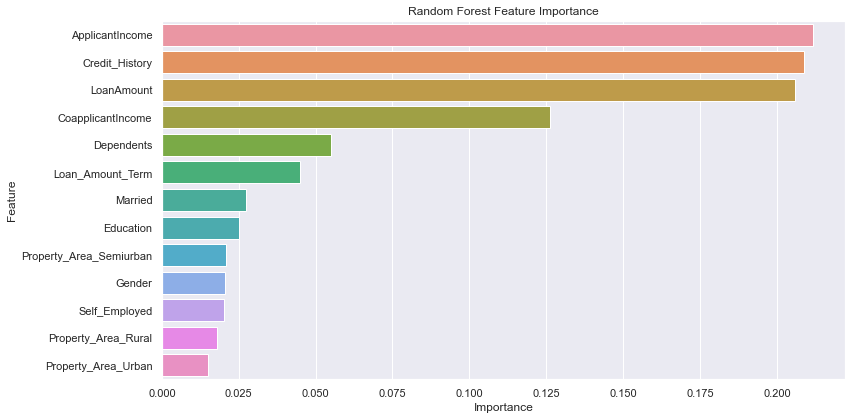

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

rf.fit(X, y)

importances = rf.feature_importances_
features = X.columns

feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf, X_scaled, y, cv=5)
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.7882980141276823


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cv_scores = cross_val_score(voting_clf, X_scaled, y, cv=5)
print("CV Accuracy:", cv_scores.mean())

y_pred = voting_clf.predict(X_scaled)

precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

conf_matrix = confusion_matrix(y, y_pred)

print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)
print("Confusion Matrix:\n", conf_matrix)

CV Accuracy: 0.7882980141276823
Precision (weighted): 0.9542924042362385
Recall (weighted): 0.9527687296416938
F1 Score (weighted): 0.9518906140579316
Confusion Matrix:
 [[166  26]
 [  3 419]]
